In [1]:
import pdal
import numpy as np
import pandas as pd
import laspy
import open3d as o3d
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [14]:
# Step 1: Read the .laz file
file_path = 'PMF_Filtering_Output.laz'  
lidar_data = laspy.read(file_path)

# Step 2: Prepare the data
# Extract the coordinates
coords = np.vstack((lidar_data.x, lidar_data.y, lidar_data.z)).transpose()

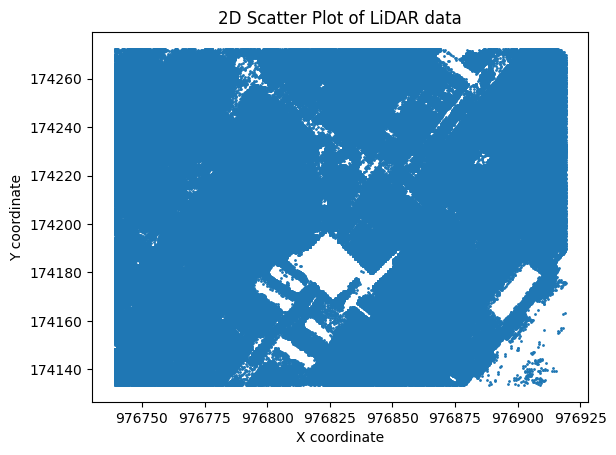

In [15]:
plt.scatter(coords[:, 0], coords[:, 1], s=1)  
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('2D Scatter Plot of LiDAR data')
plt.show()

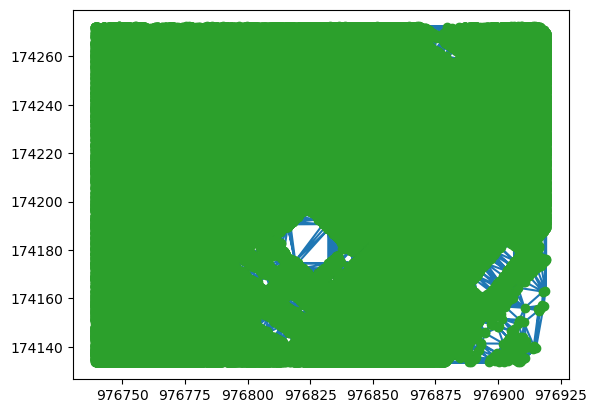

C:\Users\XXY\AppData\Local\Temp\ipykernel_32228\3667674313.py:25: RuntimeWarning: invalid value encountered in sqrt
  area = np.sqrt(s * (s - a) * (s - b) * (s - c))


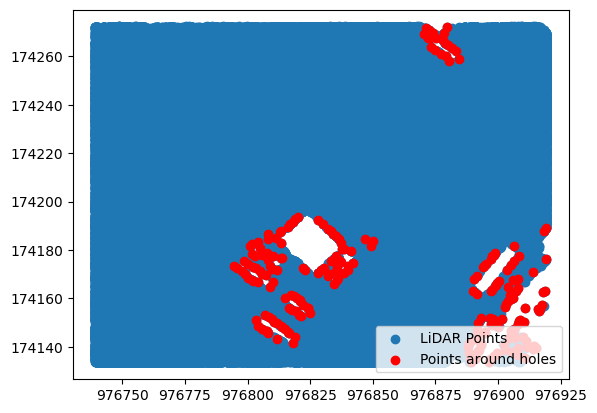

In [11]:
points_2d = coords[:, :2]

# Perform Delaunay triangulation
tri = Delaunay(points_2d)

# Plot the triangulation
plt.triplot(points_2d[:,0], points_2d[:,1], tri.simplices.copy())
plt.plot(points_2d[:,0], points_2d[:,1], 'o')
plt.show()

# Identify large triangles
max_area=5
threshold_area = 3  
large_triangles = []

for t in tri.simplices:
    # Extract the vertices for this triangle
    v1, v2, v3 = points_2d[t[0]], points_2d[t[1]], points_2d[t[2]]
    
    # Compute the area of the triangle
    a = np.linalg.norm(v2 - v1)
    b = np.linalg.norm(v3 - v2)
    c = np.linalg.norm(v1 - v3)
    s = (a + b + c) / 2
    area = np.sqrt(s * (s - a) * (s - b) * (s - c))

    
    if area > threshold_area and area < max_area:
        large_triangles.append(t)
        

# Extract points around holes
points_around_holes = np.unique(np.concatenate(large_triangles))

# Visualize holes
plt.scatter(points_2d[:,0], points_2d[:,1], label='LiDAR Points')
plt.scatter(points_2d[points_around_holes,0], points_2d[points_around_holes,1], c='r', label='Points around holes')
plt.legend()
plt.show()
